In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Study_DL

/content/drive/MyDrive/Study_DL


In [4]:
import torch 

torch.cuda.is_available()

True

# 1. 드롭아웃, 이미지 증식을 통한 컨브넷 모델 생성

In [5]:
import os

In [6]:
train_dir = './필요데이터/cats_and_dogs_small/train/'
validation_dir = './필요데이터/cats_and_dogs_small/validation/'
test_dir = './필요데이터/cats_and_dogs_small/test'

## 모델 생성

In [7]:
from keras import models, layers, optimizers

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

# 드롭아웃 추가
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


# 모델 컴파일
model.compile(optimizer = optimizers.RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 이미지 증식

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2
)

test_gen = ImageDataGenerator(
    rescale = 1./255
)

In [18]:
train_generator = train_gen.flow_from_directory(
                                train_dir,
                                target_size = (150, 150),
                                batch_size = 20,
                                class_mode = 'binary'
                            )

val_generator = test_gen.flow_from_directory(
                                validation_dir,
                                target_size = (150,150),
                                batch_size = 20,
                                class_mode = 'binary'
                            )
test_generator = test_gen.flow_from_directory(
                                test_dir,
                                target_size = (150,150),
                                batch_size = 20,
                                class_mode = 'binary'
                            )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
                              train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = val_generator,
                              validation_steps = 50
                            )

<ipython-input-20-c93482cab83f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 24s 223ms/step - loss: 0.6933 - acc: 0.5155 - val_loss: 0.6921 - val_acc: 0.5170
Epoch 2/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6830 - acc: 0.5560 - val_loss: 0.6619 - val_acc: 0.6030
Epoch 3/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6675 - acc: 0.5905 - val_loss: 0.7203 - val_acc: 0.5190
Epoch 4/100
100/100 [==============================] - 23s 226ms/step - loss: 0.6552 - acc: 0.6040 - val_loss: 0.6481 - val_acc: 0.6000
Epoch 5/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6353 - acc: 0.6325 - val_loss: 0.6113 - val_acc: 0.6580
Epoch 6/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6270 - acc: 0.6450 - val_loss: 0.6546 - val_acc: 0.5820
Epoch 7/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6139 - acc: 0.6630 - val_loss: 0.5908 - val_acc: 0.6740
Epoch 8/100
100/100 [===========================

In [24]:
# 모델 저장
model.save('./230202_cats_and_dogs_models_2.h5')

## 학습 결과 시각화

In [16]:
import matplotlib.pyplot as plt

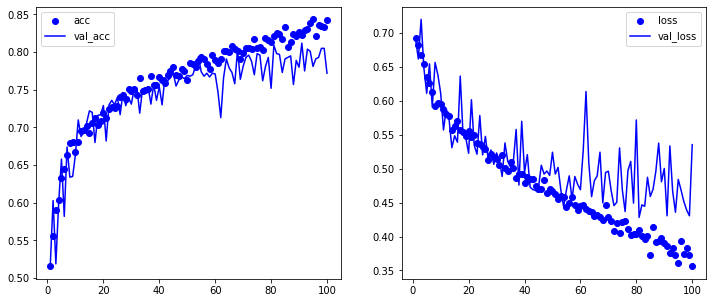

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

train_li = ['acc', 'loss']
val_li = ['val_acc', 'val_loss']

# x축
epochs = range(1, len(acc) + 1)

# 정확도, 손실 시각화
plt.figure(figsize = (12, 5))
for i in range(2):
  plt.subplot(1, 2 , i+1)
  plt.plot(epochs, eval(train_li[i]), 'bo', label = train_li[i])
  plt.plot(epochs, eval(val_li[i]), 'b', label = val_li[i])
  plt.legend()
plt.show()